In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
DATAFILEPATH = "../../Data/SwaT.A1&A2-Dec2015/Physical/"
ATTACKFILEPATH = "../../Data/SwaT.A1&A2-Dec2015/drive-download-20220826T152933Z-001/"
NORMALDATAFILE = "SWaT_Dataset_Normal_v1.xlsx"
ATTACKDATAFILE = "SWaT_Dataset_Attack_v0.xlsx"
ATTACKDETAILS = "List_of_attacks_Final.xlsx"
NORMALDATAPickleFile = "SWaT_Dataset_Normal_v1.pkl"

In [3]:
ACTUALATTACKDATA = os.path.join(DATAFILEPATH , ATTACKDATAFILE)
ATTACKDETAILS = os.path.join(ATTACKFILEPATH , ATTACKDETAILS)
NORMALDATA = os.path.join(DATAFILEPATH , NORMALDATAFILE)
NORMALDATAPickle = os.path.join(DATAFILEPATH , NORMALDATAPickleFile)

print(ACTUALATTACKDATA)
print(ATTACKDETAILS)
print(NORMALDATA)
print(NORMALDATAPickle)

../../Data/SwaT.A1&A2-Dec2015/Physical/SWaT_Dataset_Attack_v0.xlsx
../../Data/SwaT.A1&A2-Dec2015/drive-download-20220826T152933Z-001/List_of_attacks_Final.xlsx
../../Data/SwaT.A1&A2-Dec2015/Physical/SWaT_Dataset_Normal_v1.xlsx
../../Data/SwaT.A1&A2-Dec2015/Physical/SWaT_Dataset_Normal_v1.pkl


# Load Data Files

In [4]:
# Read from Pickle
dfNormalData =  pd.read_pickle(NORMALDATAPickle)
dfNormalData["Timestamp"] = pd.to_datetime(dfNormalData["Timestamp"])
dfNormalData["formatTimestamp"] = pd.to_datetime(dfNormalData["Timestamp"], 
                                              format="%Y-%m-%d %H:%M:%S").dt.strftime("%Y-%m-%d %H:%M:%S")


print(dfNormalData.shape)
dfNormalData.head()

(495000, 54)


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack,formatTimestamp
0,2015-12-22 16:30:00,0,124.3135,1,1,1,251.9226,8.313446,312.7916,0,...,1,9.100231,0,3.3485,0.000256,1,1,1,Normal,2015-12-22 16:30:00
1,2015-12-22 16:30:01,0,124.392,1,1,1,251.9226,8.313446,312.7916,0,...,1,9.100231,0,3.3485,0.000256,1,1,1,Normal,2015-12-22 16:30:01
2,2015-12-22 16:30:02,0,124.4705,1,1,1,251.9226,8.313446,312.7916,0,...,1,9.100231,0,3.3485,0.000256,1,1,1,Normal,2015-12-22 16:30:02
3,2015-12-22 16:30:03,0,124.6668,1,1,1,251.9226,8.313446,312.7916,0,...,1,9.100231,0,3.3485,0.000256,1,1,1,Normal,2015-12-22 16:30:03
4,2015-12-22 16:30:04,0,124.5098,1,1,1,251.9226,8.313446,312.7916,0,...,1,9.100231,0,3.3485,0.000256,1,1,1,Normal,2015-12-22 16:30:04


In [5]:
#dfNormalData.info()

In [6]:
#dfNormalData.describe()

In [10]:
dfNormalDataCopy = dfNormalData.copy()
print(dfNormalDataCopy.shape)

(495000, 54)


In [7]:
sub_system_P1 = ["FIT101", "LIT101", "MV101", "P101", "P102"]
sub_system_P2 = ["AIT201", "AIT202", "AIT203", "FIT201", "MV201", "P201", "P202", "P203", "P204", "P205", "P206"]
sub_system_P3 = ["DPIT301", "FIT301", "LIT301", "MV301",	"MV302", "MV303", "MV304", "P301", "P302"]
sub_system_P4 = ["AIT401", "AIT402",	"FIT401", "LIT401", "P401", "P402", "P403", "P404", "UV401"]
sub_system_P5 = ["AIT501", "AIT502", "AIT503", "AIT504",	"FIT501", "FIT502",	"FIT503", "FIT504",	"P501",	"P502",	"PIT501", "PIT502",	"PIT503"]
sub_system_P6 = ["FIT601","P601", "P602", "P603"]

actutaors_P1 = ["MV101", "P101", "P102"]
actutaors_P2 = ["MV201", "P201", "P202", "P203", "P204", "P205", "P206"]
actutaors_P3 = ["MV301", "MV302", "MV303", "MV304", "P301", "P302"]
actutaors_P4 = ["LIT401", "P401", "P402", "P403", "P404", "UV401"]
actutaors_P5 = ["P501",	"P502"]
actutaors_P6 = ["P601", "P602"]

# Following columns can be ignored because they only have single value: 
ignore_P1 = ["P102"]
ignore_P2 = ["P201", "P202", "P204", "P206"]
ignore_P3 = []
ignore_P4 = ["P401", "P403", "P404"]
ignore_P5 = ["P502"]
ignore_P6 = ["P601", "P603"]

final_actuators_P1 = list(set(actutaors_P1).difference(ignore_P1)) if ignore_P1 is not None else actutaors_P1
final_actuators_P2 = list(set(actutaors_P2).difference(ignore_P2)) if ignore_P2 is not None else actutaors_P2
final_actuators_P3 = list(set(actutaors_P3).difference(ignore_P3)) if ignore_P3 is not None else actutaors_P3
final_actuators_P4 = list(set(actutaors_P4).difference(ignore_P4)) if ignore_P4 is not None else actutaors_P4
final_actuators_P5 = list(set(actutaors_P5).difference(ignore_P5)) if ignore_P5 is not None else actutaors_P5
final_actuators_P6 = list(set(actutaors_P6).difference(ignore_P6)) if ignore_P6 is not None else actutaors_P6

num_cols_P1 = list(set(sub_system_P1).difference(set(final_actuators_P1)).difference(set(ignore_P1)))
num_cols_P2 = list(set(sub_system_P2).difference(set(final_actuators_P2)).difference(set(ignore_P2)))
num_cols_P3 = list(set(sub_system_P3).difference(set(final_actuators_P3)).difference(set(ignore_P3)))
num_cols_P4 = list(set(sub_system_P4).difference(set(final_actuators_P4)).difference(set(ignore_P4)))
num_cols_P5 = list(set(sub_system_P5).difference(set(final_actuators_P5)).difference(set(ignore_P5)))
num_cols_P6 = list(set(sub_system_P6).difference(set(final_actuators_P6)).difference(set(ignore_P6)))

sub_systems = [sub_system_P1, sub_system_P2, sub_system_P3, sub_system_P4, sub_system_P5, sub_system_P6]
num_cols =  [num_cols_P1, num_cols_P2, num_cols_P3, num_cols_P4, num_cols_P5, num_cols_P6]
cat_cols =  [final_actuators_P1, final_actuators_P2, final_actuators_P3, final_actuators_P4, final_actuators_P5, final_actuators_P6]
ignore_cols = [ignore_P1, ignore_P2, ignore_P3, ignore_P4, ignore_P5, ignore_P6]

print(num_cols)
print(cat_cols)

print(num_cols_P1)
print(num_cols_P2)

print(num_cols_P3)
print(num_cols_P4)

print(num_cols_P5)
print(num_cols_P6)


[['FIT101', 'LIT101'], ['AIT202', 'FIT201', 'AIT201', 'AIT203'], ['LIT301', 'FIT301', 'DPIT301'], ['AIT401', 'AIT402', 'FIT401'], ['FIT504', 'AIT502', 'PIT502', 'FIT503', 'PIT501', 'AIT504', 'FIT502', 'AIT501', 'AIT503', 'PIT503', 'FIT501'], ['FIT601']]
[['MV101', 'P101'], ['MV201', 'P205', 'P203'], ['MV304', 'MV301', 'MV302', 'MV303', 'P302', 'P301'], ['UV401', 'LIT401', 'P402'], ['P501'], ['P602']]
['FIT101', 'LIT101']
['AIT202', 'FIT201', 'AIT201', 'AIT203']
['LIT301', 'FIT301', 'DPIT301']
['AIT401', 'AIT402', 'FIT401']
['FIT504', 'AIT502', 'PIT502', 'FIT503', 'PIT501', 'AIT504', 'FIT502', 'AIT501', 'AIT503', 'PIT503', 'FIT501']
['FIT601']


In [8]:
numericCols = [x for sub in num_cols for x in sub]
print(numericCols)


['FIT101', 'LIT101', 'AIT202', 'FIT201', 'AIT201', 'AIT203', 'LIT301', 'FIT301', 'DPIT301', 'AIT401', 'AIT402', 'FIT401', 'FIT504', 'AIT502', 'PIT502', 'FIT503', 'PIT501', 'AIT504', 'FIT502', 'AIT501', 'AIT503', 'PIT503', 'FIT501', 'FIT601']


In [11]:
dfNormalDataCopy[numericCols] = dfNormalDataCopy[numericCols].apply(pd.to_numeric)
display(dfNormalDataCopy.head())
#dfNormalDataCopy.info()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack,formatTimestamp
0,2015-12-22 16:30:00,0.0,124.3135,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal,2015-12-22 16:30:00
1,2015-12-22 16:30:01,0.0,124.3920,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal,2015-12-22 16:30:01
2,2015-12-22 16:30:02,0.0,124.4705,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal,2015-12-22 16:30:02
3,2015-12-22 16:30:03,0.0,124.6668,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal,2015-12-22 16:30:03
4,2015-12-22 16:30:04,0.0,124.5098,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal,2015-12-22 16:30:04


In [25]:
#print(dfNormalDataCopy.describe())

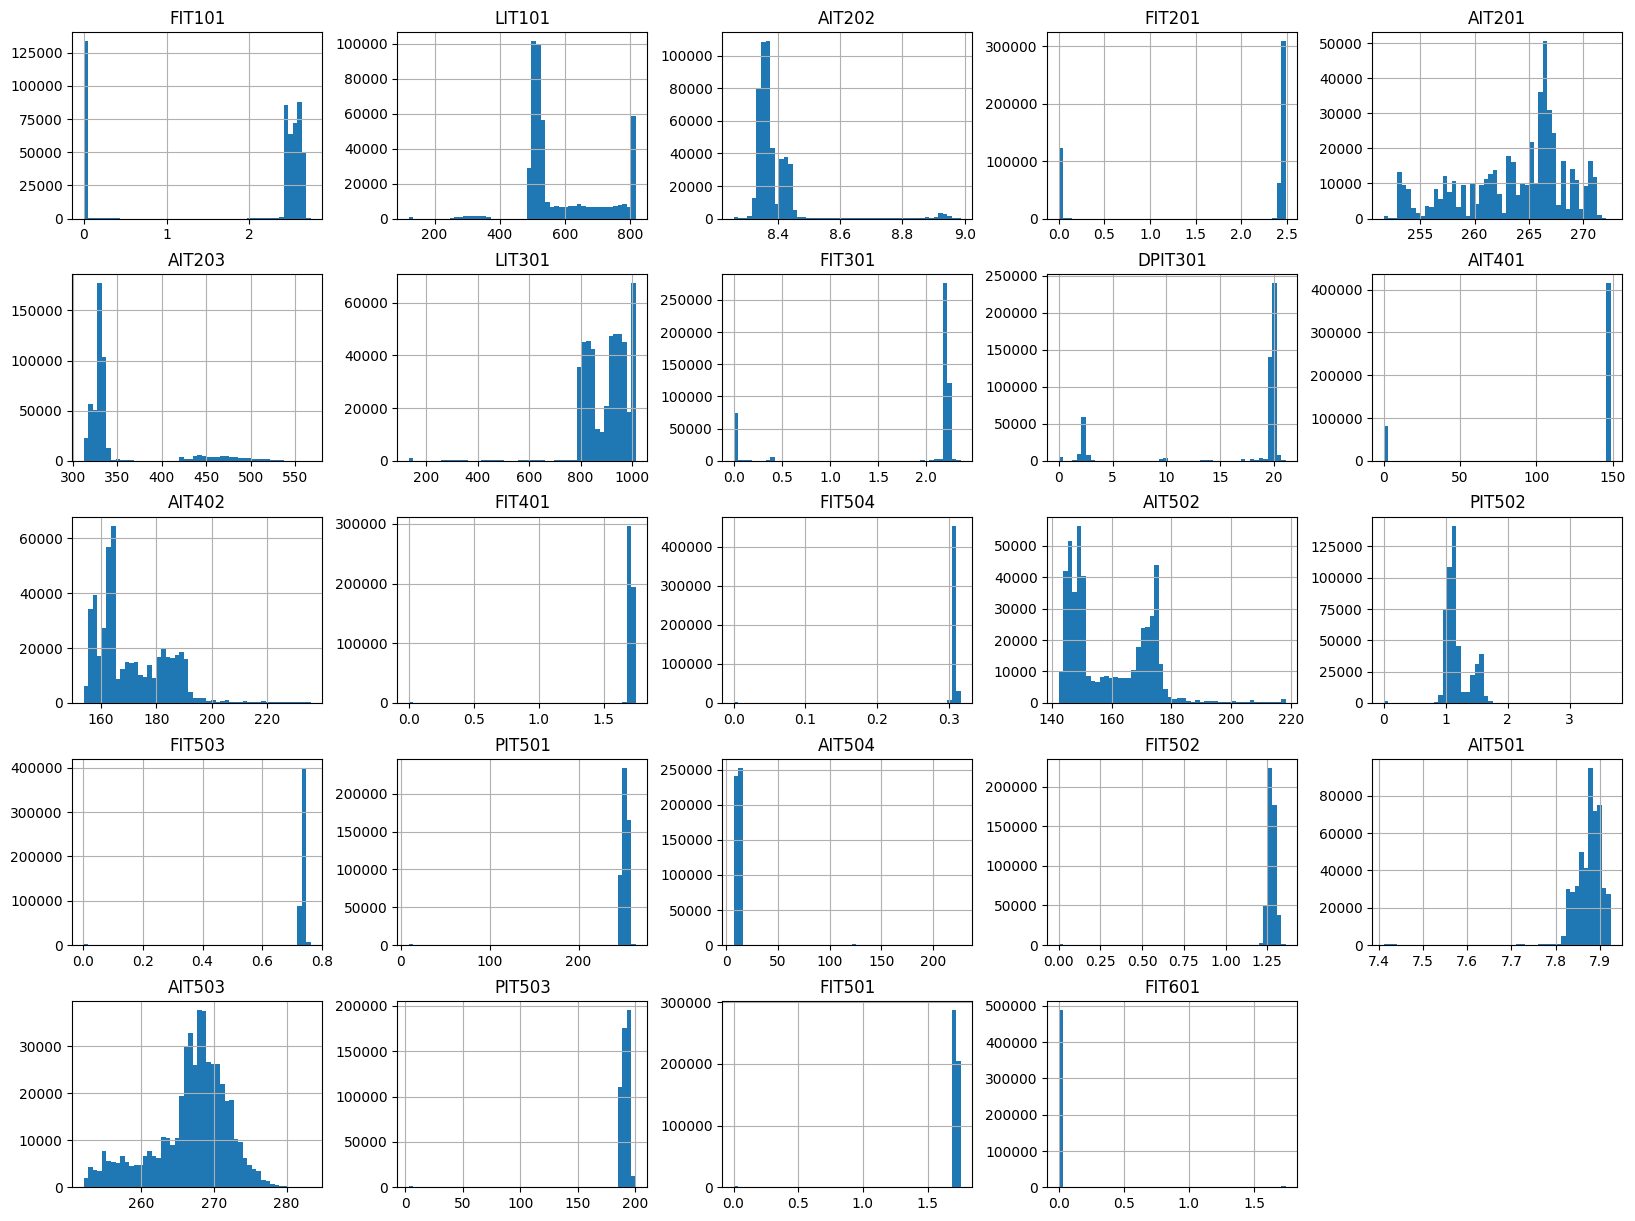

In [12]:
#observing if there is any outlier
#%matplotlib inline 
import matplotlib.pyplot as plt
dfNormalDataCopy[numericCols].hist(bins=50, figsize=(20,15))
plt.savefig("NormalDataAllNumCols.png")
plt.show()

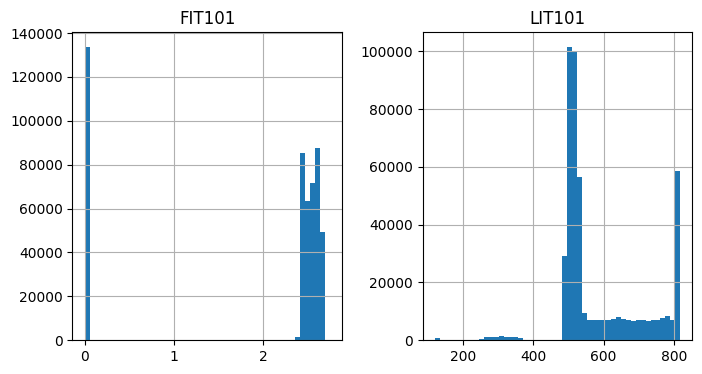

In [33]:

dfNormalDataCopy[num_cols_P1].hist(bins=50, figsize=(8,4))
plt.savefig("NormalDataP1.png")
plt.show()

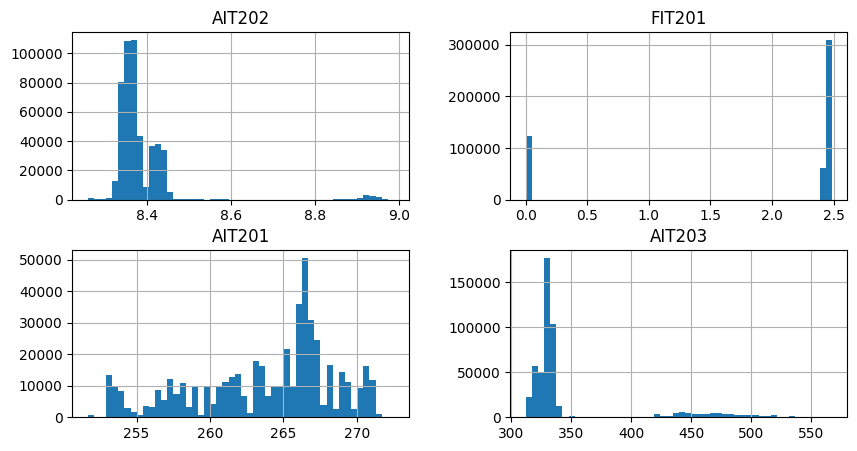

In [14]:

dfNormalDataCopy[num_cols_P2].hist(bins=50, figsize=(10,5))
plt.savefig("NormalDataP2.png")
plt.show()

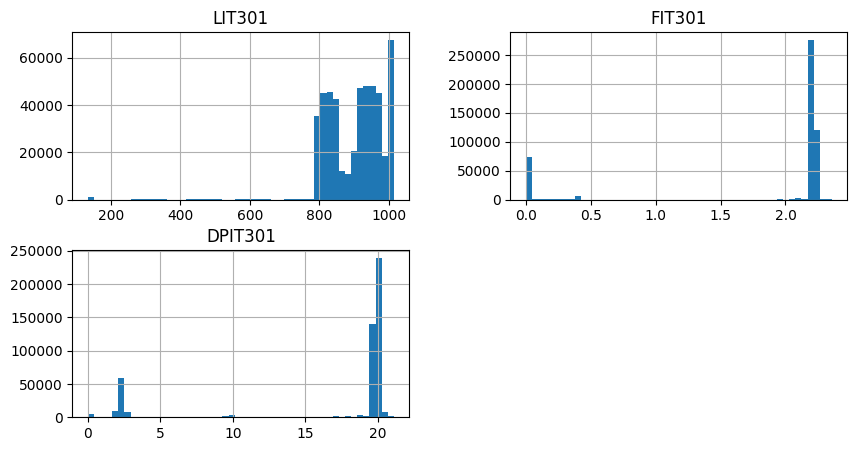

In [38]:

dfNormalDataCopy[num_cols_P3].hist(bins=50, figsize=(10,5))
plt.savefig("NormalDataP3.png")
plt.show()

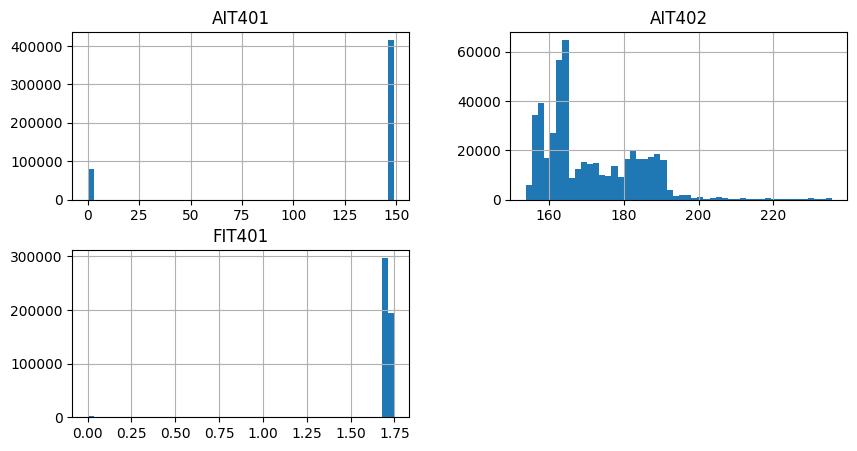

In [16]:

dfNormalDataCopy[num_cols_P4].hist(bins=50, figsize=(10,5))
plt.savefig("NormalDataP4.png")
plt.show()

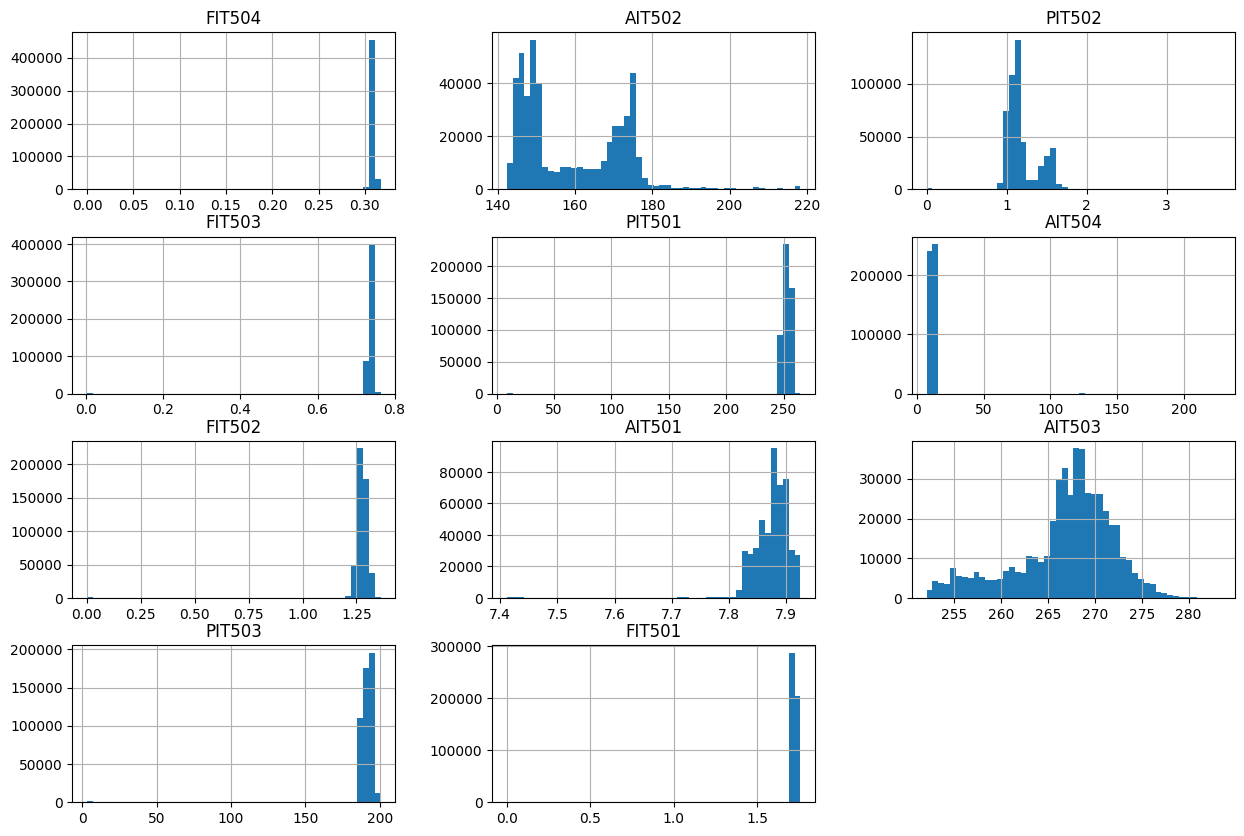

In [35]:

dfNormalDataCopy[num_cols_P5].hist(bins=50, figsize=(15,10))
plt.savefig("NormalDataP5.png")
plt.show()

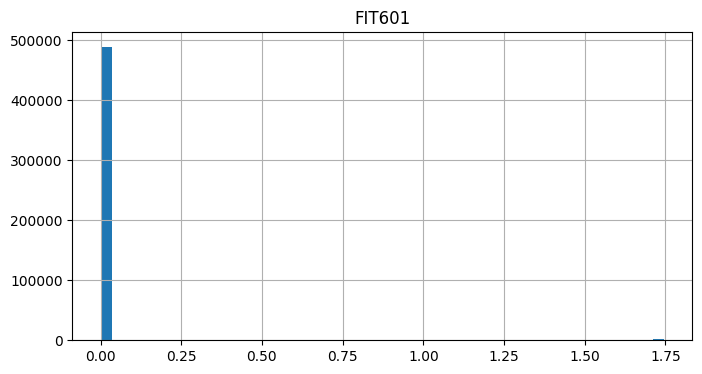

In [36]:

dfNormalDataCopy[num_cols_P6].hist(bins=50, figsize=(8,4))
plt.savefig("NormalDataP6.png")
plt.show()

C:\Users\kkcar\AppData\Local\Temp\ipykernel_5824\939723105.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dfNormalDataCopy[num_cols_P1].hist(bins=50,ax=ax1)
C:\Users\kkcar\AppData\Local\Temp\ipykernel_5824\939723105.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dfNormalDataCopy[num_cols_P2].hist(bins=50,ax=ax2)
C:\Users\kkcar\AppData\Local\Temp\ipykernel_5824\939723105.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dfNormalDataCopy[num_cols_P3].hist(bins=50,ax=ax3)
C:\Users\kkcar\AppData\Local\Temp\ipykernel_5824\939723105.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dfNormalDataCopy[num_cols_P4].hist(bins=50,ax=ax4)
C:\Users\kkcar\AppData\Local\Temp\ipykernel_5824\939723105.py:10: UserWarning: To output multiple subplots, the figure containing the pa

array([<AxesSubplot:title={'center':'FIT601'}>], dtype=object)

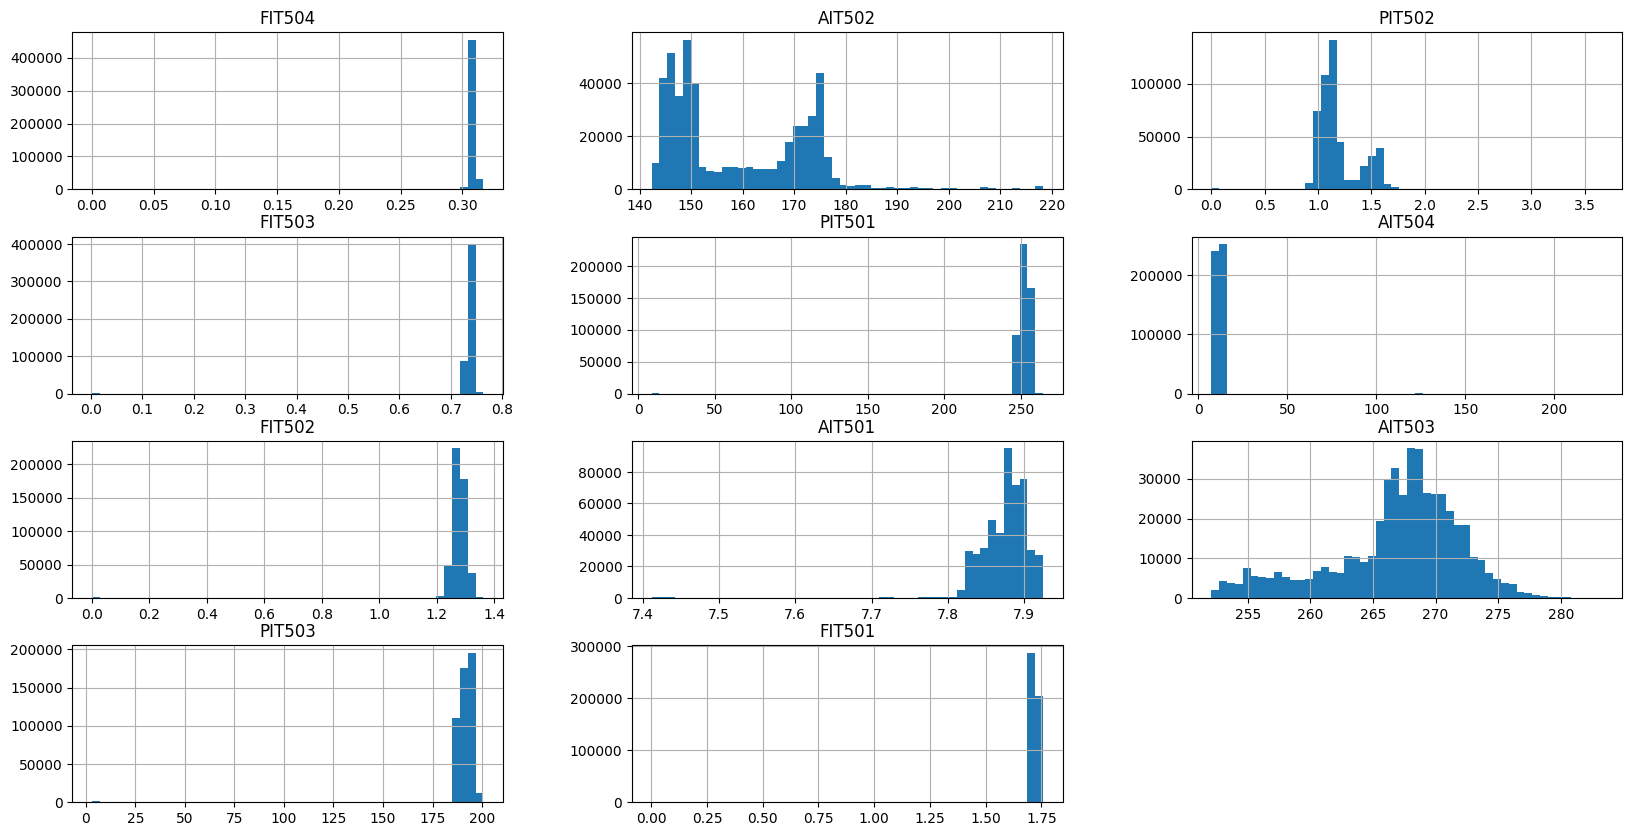

In [20]:
#fig, axs = plt.subplots(1,1,figsize=(20,10))
#fig, axs = plt.subplots(1, 2,figsize=(20,10))
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,figsize=(20,10))
dfNormalDataCopy[num_cols_P1].hist(bins=50,ax=ax1)
dfNormalDataCopy[num_cols_P2].hist(bins=50,ax=ax2)

dfNormalDataCopy[num_cols_P3].hist(bins=50,ax=ax3)
dfNormalDataCopy[num_cols_P4].hist(bins=50,ax=ax4)

dfNormalDataCopy[num_cols_P5].hist(bins=50,ax=ax5)
dfNormalDataCopy[num_cols_P6].hist(bins=50,ax=ax6)

In [21]:
#def getCorrelationMatrixandPlot(df.colList):
import seaborn as sns
import matplotlib.pyplot as plt   

In [22]:
corr_matrix = dfNormalDataCopy[numericCols].corr()
#corr_matrix

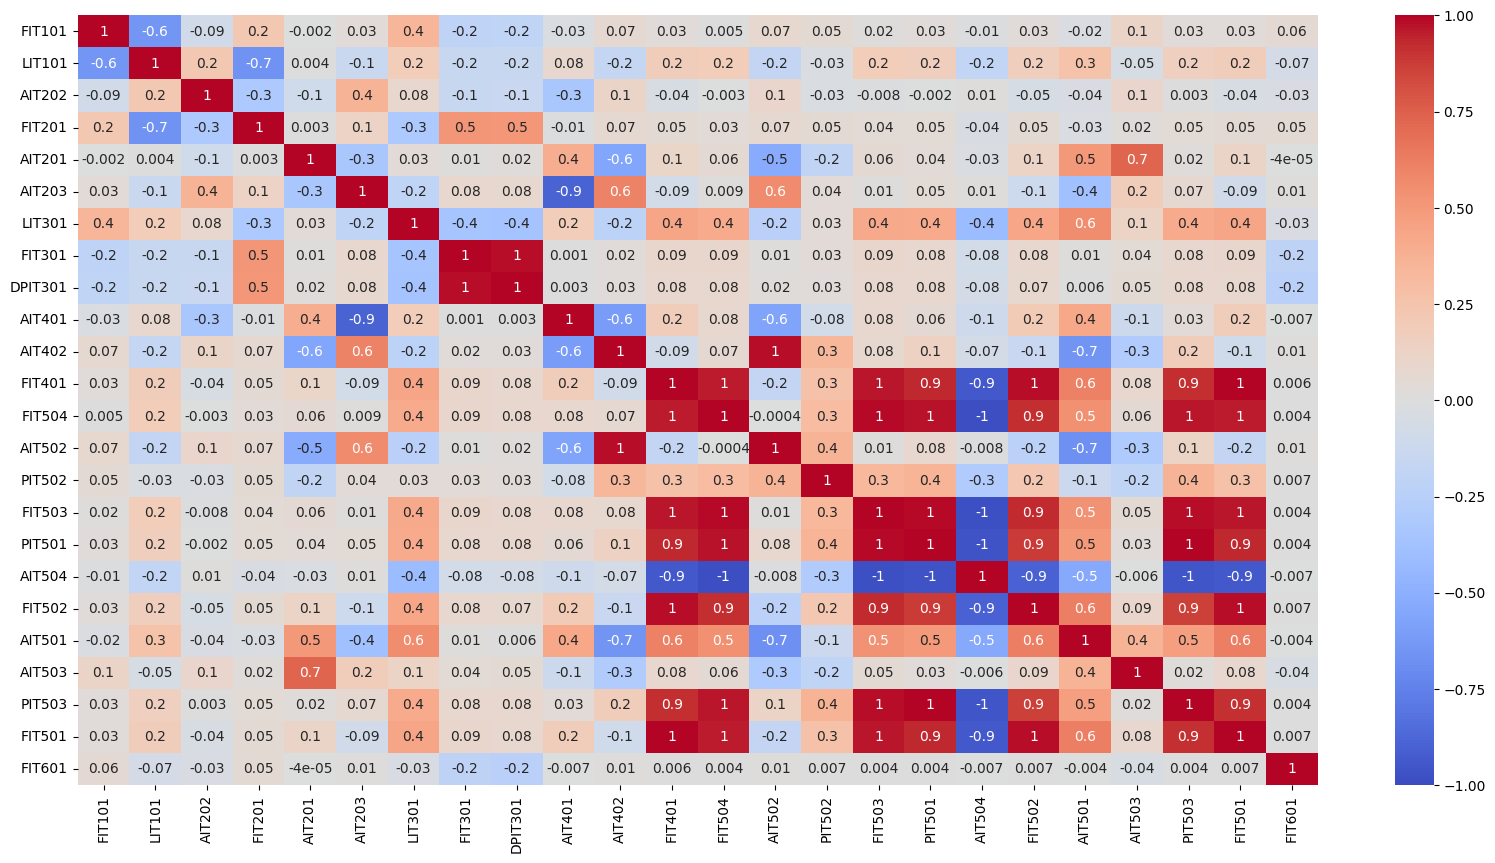

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr_matrix, annot = True, fmt= '0.1g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',ax=ax)

plt.savefig("NormalDataHeatMap.png")

In [24]:
p1=dfNormalDataCopy[sub_system_P1]
p1[sub_system_P1] = p1[sub_system_P1].apply(pd.to_numeric)
print(p1.shape)
display(p1.head())
p1.info()

(495000, 5)


C:\Users\kkcar\AppData\Local\Temp\ipykernel_5824\1531210761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1[sub_system_P1] = p1[sub_system_P1].apply(pd.to_numeric)


,FIT101,LIT101,MV101,P101,P102
0,0.0,124.3135,1,1,1
1,0.0,124.3920,1,1,1
2,0.0,124.4705,1,1,1
3,0.0,124.6668,1,1,1
4,0.0,124.5098,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495000 entries, 0 to 494999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   FIT101  495000 non-null  float64
 1   LIT101  495000 non-null  float64
 2   MV101   495000 non-null  int64  
 3   P101    495000 non-null  int64  
 4   P102    495000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 18.9 MB


['FIT101', 'LIT101', 'MV101', 'P101', 'P102']


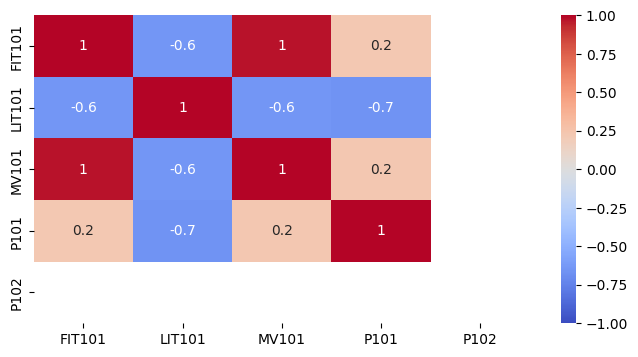

In [25]:
print(sub_system_P1)
dfNormalDataCopy[sub_system_P1] = dfNormalDataCopy[sub_system_P1].apply(pd.to_numeric)
corr_matrix = dfNormalDataCopy[sub_system_P1].corr()
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(corr_matrix, annot = True, fmt= '0.1g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',ax=ax)

plt.savefig("NormalDataHeatMap_P1.png")


['AIT201', 'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206']


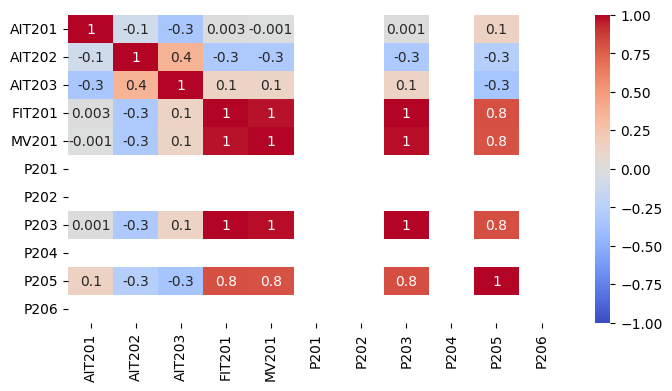

In [26]:
print(sub_system_P2)
dfNormalDataCopy[sub_system_P2] = dfNormalDataCopy[sub_system_P2].apply(pd.to_numeric)
corr_matrix = dfNormalDataCopy[sub_system_P2].corr()
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(corr_matrix, annot = True, fmt= '0.1g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',ax=ax)

plt.savefig("NormalDataHeatMap_P2.png")


['DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302']


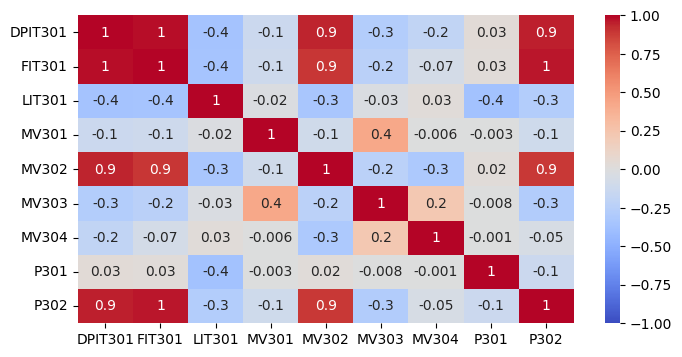

In [27]:
print(sub_system_P3)
dfNormalDataCopy[sub_system_P3] = dfNormalDataCopy[sub_system_P3].apply(pd.to_numeric)
corr_matrix = dfNormalDataCopy[sub_system_P3].corr()
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(corr_matrix, annot = True, fmt= '0.1g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',ax=ax)

plt.savefig("NormalDataHeatMap_P2.png")


['AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401']


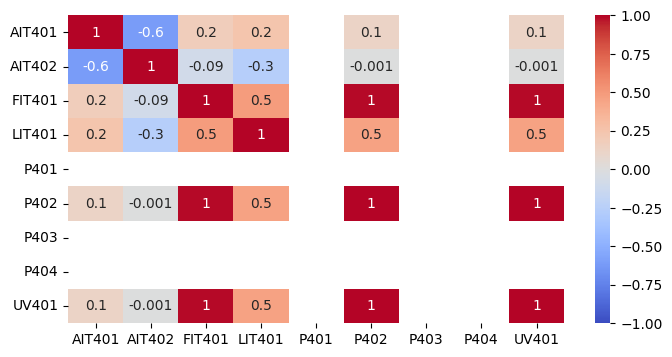

In [28]:
print(sub_system_P4)
dfNormalDataCopy[sub_system_P4] = dfNormalDataCopy[sub_system_P4].apply(pd.to_numeric)
corr_matrix = dfNormalDataCopy[sub_system_P4].corr()
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(corr_matrix, annot = True, fmt= '0.1g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',ax=ax)

plt.savefig("NormalDataHeatMap_P2.png")


['AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501', 'PIT502', 'PIT503']


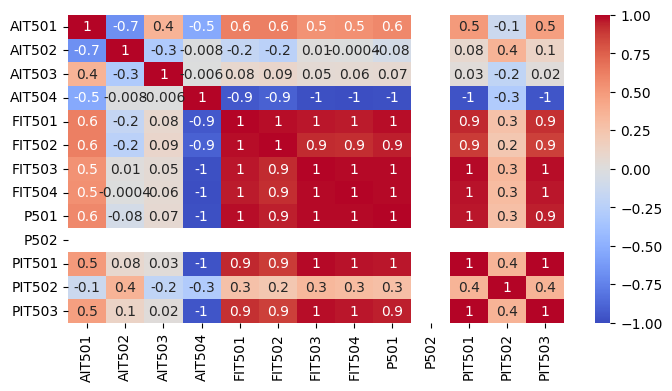

In [29]:
print(sub_system_P5)
dfNormalDataCopy[sub_system_P5] = dfNormalDataCopy[sub_system_P5].apply(pd.to_numeric)
corr_matrix = dfNormalDataCopy[sub_system_P5].corr()
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(corr_matrix, annot = True, fmt= '0.1g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',ax=ax)

plt.savefig("NormalDataHeatMap_P2.png")


['FIT601', 'P601', 'P602', 'P603']


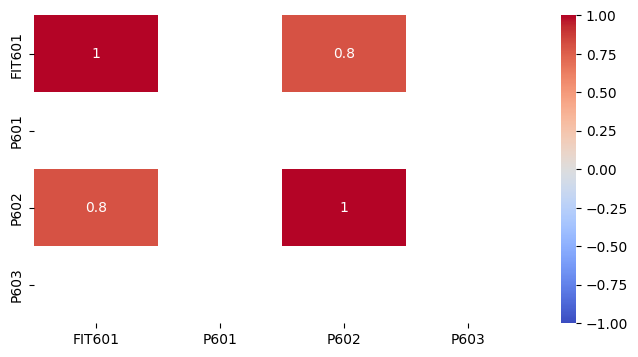

In [30]:
print(sub_system_P6)
dfNormalDataCopy[sub_system_P6] = dfNormalDataCopy[sub_system_P6].apply(pd.to_numeric)
corr_matrix = dfNormalDataCopy[sub_system_P6].corr()
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(corr_matrix, annot = True, fmt= '0.1g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',ax=ax)

plt.savefig("NormalDataHeatMap_P2.png")


In [31]:
# Put everything together
dfNormalDataCopy[sub_system_P1] = dfNormalDataCopy[sub_system_P1].apply(pd.to_numeric)
corr_matrix_1 = dfNormalDataCopy[sub_system_P1].corr()

dfNormalDataCopy[sub_system_P2] = dfNormalDataCopy[sub_system_P2].apply(pd.to_numeric)
corr_matrix_2 = dfNormalDataCopy[sub_system_P2].corr()

dfNormalDataCopy[sub_system_P3] = dfNormalDataCopy[sub_system_P3].apply(pd.to_numeric)
corr_matrix_3 = dfNormalDataCopy[sub_system_P3].corr()

dfNormalDataCopy[sub_system_P4] = dfNormalDataCopy[sub_system_P4].apply(pd.to_numeric)
corr_matrix_4 = dfNormalDataCopy[sub_system_P4].corr()

dfNormalDataCopy[sub_system_P5] = dfNormalDataCopy[sub_system_P5].apply(pd.to_numeric)
corr_matrix_5 = dfNormalDataCopy[sub_system_P5].corr()

dfNormalDataCopy[sub_system_P6] = dfNormalDataCopy[sub_system_P6].apply(pd.to_numeric)
corr_matrix_6 = dfNormalDataCopy[sub_system_P6].corr()






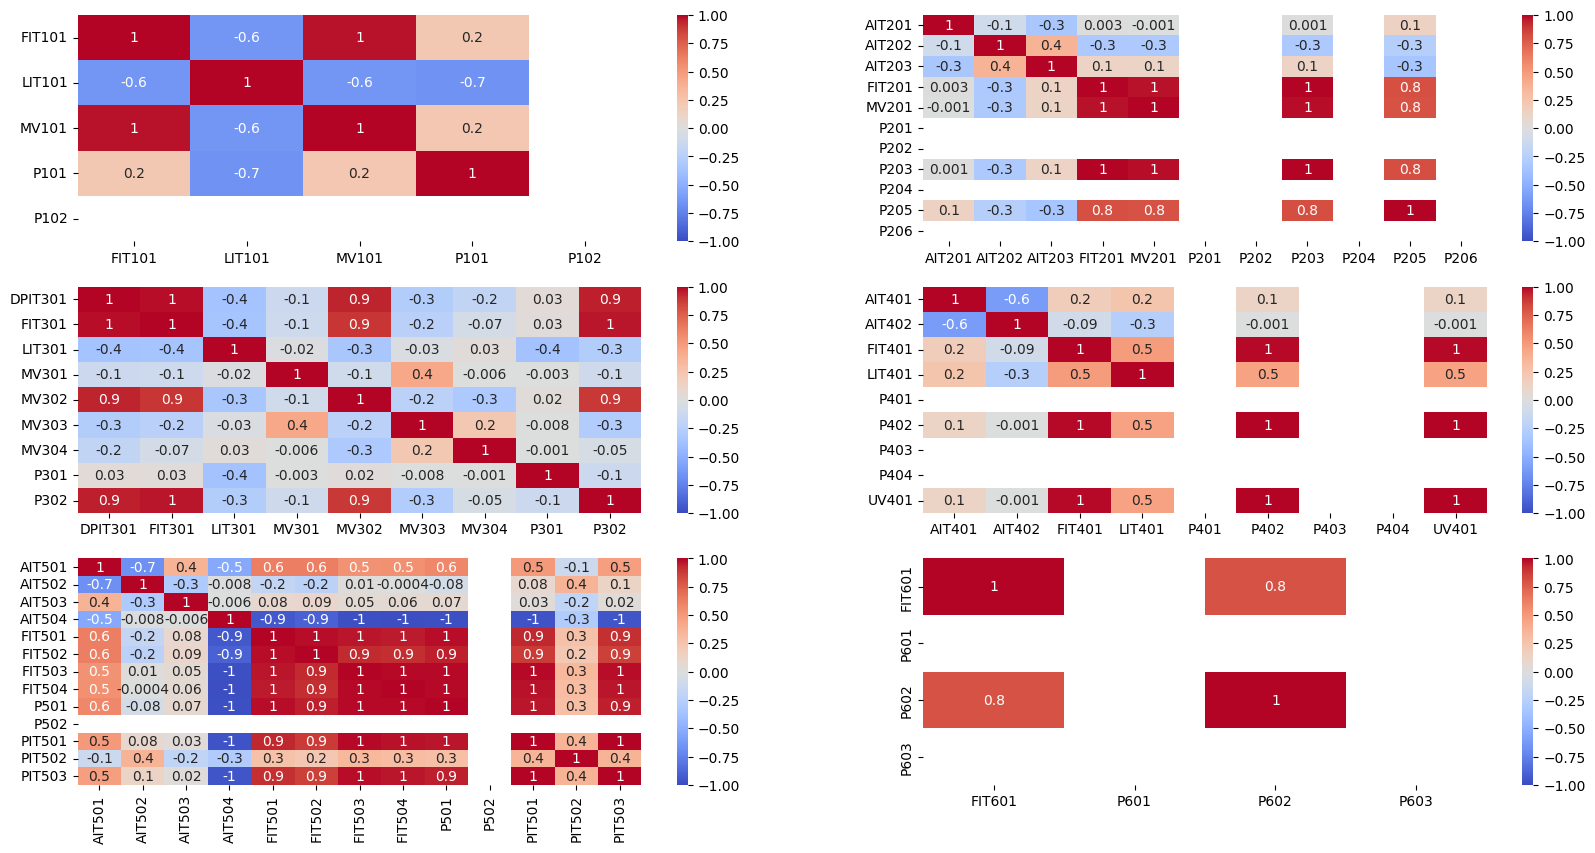

In [39]:
fig, axs = plt.subplots(3, 2,figsize=(20,10))
sns.heatmap(corr_matrix_1, annot = True, fmt= '0.1g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',ax=axs[0,0])
sns.heatmap(corr_matrix_2, annot = True, fmt= '0.1g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',ax=axs[0,1])

sns.heatmap(corr_matrix_3, annot = True, fmt= '0.1g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',ax=axs[1,0])
sns.heatmap(corr_matrix_4, annot = True, fmt= '0.1g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',ax=axs[1,1])

sns.heatmap(corr_matrix_5, annot = True, fmt= '0.1g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',ax=axs[2,0])
sns.heatmap(corr_matrix_6, annot = True, fmt= '0.1g',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',ax=axs[2,1])

plt.savefig("AllSubSystemHeatMap.png")
plt.show()